Interactive notebook that produces depth and disparity maps for images. 

In [55]:
# Mount google drive and imports 
from google.colab import drive
drive.mount('/content/gdrive')

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [56]:
# Optional: create output directory 
# !mkdir /content/gdrive/MyDrive/CSC420_Project/out

In [57]:
# Define path to load data and save output
data_dir = '/content/gdrive/MyDrive/CSC420_Project/data'
out_dir = '/content/gdrive/MyDrive/CSC420_Project/out'

## Disparity Map

In [44]:
# Compute disparity of images
def computeDisparity(image_left, image_right, num_disparities, block_size, min_disparity):
    stereo = cv.StereoSGBM_create(numDisparities=num_disparities, blockSize=block_size, minDisparity=min_disparity)
    disparity = stereo.compute(image_left, image_right).astype(np.float32)/16
    return disparity

## Depth Map


In [45]:
# Compute depth of images
def computeDepth(disparity_map, T, f):
    depth = np.divide(f * T, disparity_map, where=disparity_map!=0)
    return depth

In [46]:
# Get camera parameters from calibration file
def getCameraParams(calib_file):
    with open(calib_file) as f:
        line = f.readlines()[1].split()
        f = float(line[1])
        T = -float(line[4])/f 
        px = float(line[3])
        py = float(line[7])
    return f, T, px, py

Get maps for sample image: 

In [59]:
# Sample image ID
image_id = 'umm_000000'

# Camera parameters (from calibration file)
calib_file = os.path.join(data_dir, f'train/calib/{image_id}.txt')
f, T, px, py = getCameraParams(calib_file)

# Read images
image_left = cv.imread(os.path.join(data_dir, f'train/image_left/{image_id}.jpg'), cv.IMREAD_GRAYSCALE)
image_right = cv.imread(os.path.join(data_dir, f'train/image_right/{image_id}.jpg'), cv.IMREAD_GRAYSCALE)

Text(0.5, 1.0, 'Disparity map for umm_000000')

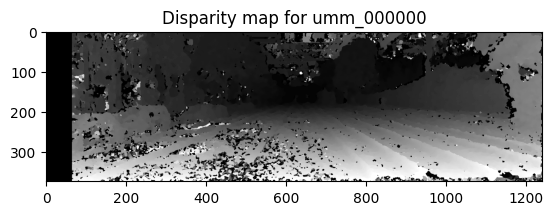

In [60]:
# Compute disparity and visualize
disparity = computeDisparity(image_left, image_right, 64, 9, 1)
disparity_map = cv.normalize(disparity, None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX)
cv.imwrite(os.path.join(out_dir, f'disparity_map_{image_id}.jpg'), disparity_map)
plt.imshow(disparity_map, cmap='gray')
plt.title(f"Disparity map for {image_id}")

Text(0.5, 1.0, 'Depth map for umm_000000')

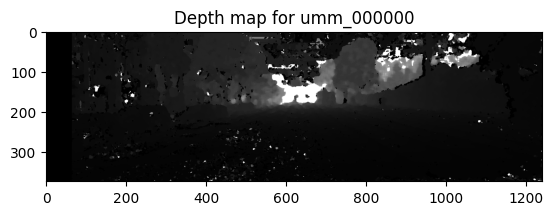

In [61]:
# Compute depth and visualize
depth = computeDepth(disparity, T, f)
depth_map = cv.normalize(depth, None, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)
cv.imwrite(os.path.join(out_dir, f'depth_map_{image_id}.jpg'), depth)
plt.imshow(depth_map, cmap='gray')
plt.title(f"Depth map for {image_id}")